In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Input
from random import *
from sklearn.model_selection import train_test_split

## Prepare Input

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

features = pd.DataFrame()
labels = pd.DataFrame()

for i,row in train.iterrows():
    x = np.zeros(104)
    index1 = "ABCDEFGHIJKLMNOPQRSTUVWXYZ".find(row[0][0])
    index2 = "ABCDEFGHIJKLMNOPQRSTUVWXYZ".find(row[0][1])
    index3 = "ABCDEFGHIJKLMNOPQRSTUVWXYZ".find(row[0][2])
    index4 = "ABCDEFGHIJKLMNOPQRSTUVWXYZ".find(row[0][3])
    x[index1] = 1
    x[index2 + 26*1] = 1
    x[index3 + 26*2] = 1
    x[index4 + 26*3] = 1
    row_df = pd.DataFrame([x])
    features = pd.concat([features,row_df],ignore_index=True)
    value = np.array(row[1])
    value_df = pd.DataFrame([value])
    labels = pd.concat([labels,value_df],ignore_index=True)
    if (i%5000 == 0):
        print(i)

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000


In [3]:
labelY = []
for i,row in train.iterrows():
    labelY.append(np.array([row[1],1-row[1]]))
arrY = np.array(labelY)

In [4]:
arrY

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]])

In [5]:
test = pd.read_csv('test.csv')
featuresTest = pd.DataFrame()

for i,row in test.iterrows():
    x = np.zeros(104)
    index1 = "ABCDEFGHIJKLMNOPQRSTUVWXYZ".find(row[0][0])
    index2 = "ABCDEFGHIJKLMNOPQRSTUVWXYZ".find(row[0][1])
    index3 = "ABCDEFGHIJKLMNOPQRSTUVWXYZ".find(row[0][2])
    index4 = "ABCDEFGHIJKLMNOPQRSTUVWXYZ".find(row[0][3])
    x[index1] = 1
    x[index2 + 26*1] = 1
    x[index3 + 26*2] = 1
    x[index4 + 26*3] = 1
    row_df = pd.DataFrame([x])
    featuresTest = pd.concat([featuresTest,row_df],ignore_index=True)
    if (i%5000 == 0):
        print(i)

featuresTest


0
5000
10000
15000
20000
25000
30000
35000
40000
45000


,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47998,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, arrY, test_size = 0.2, random_state = 71)
X_train.astype('float32')
X_test.astype('float32')
y_train.astype('float32')
y_test.astype('float32')
from tensorflow.keras import Sequential,layers, Input
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(104,)))
model.add(Dropout(0.42,seed = 42))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [7]:
print(y_train.shape)
model.summary()
history = model.fit(
    np.array(X_train),np.array(y_train),
    validation_data=(np.array(X_test),np.array(y_test)),
    epochs=40, 
    verbose = 1
    )

(89600, 2)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              107520    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2050      
Total params: 109,570
Trainable params: 109,570
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
2800/2800 [==============================] - 4s 1ms/step - loss: 0.0554 - accuracy: 0.9797 - val_loss: 0.0422 - val_accuracy: 0.9842
Epoch 2/40
2800/2800 [==============================] - 3s 1ms/step - loss: 0.0321 - accuracy: 0.9874 - val_loss: 0.0318 - val_accuracy: 0.9881
Epoch 3/40
2800/2800 [==============================] - 4s 1ms/step - loss: 0.026

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


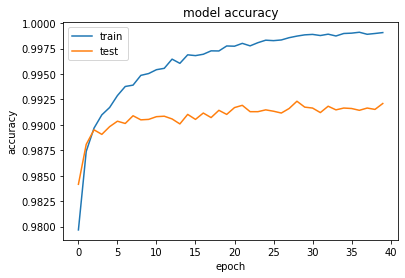

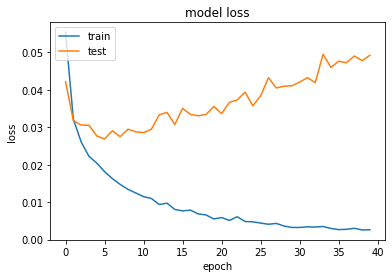

In [8]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
y_p = model.predict([X_test])
y_predicted = []

for x in y_p:
    if (x[0]>0.5):
        y_predicted.append(1)
    else:
        y_predicted.append(0)
        
from sklearn.metrics import f1_score
print(f1_score(y_test[:,0], y_predicted))

print(sum(y_predicted))

0.896551724137931
855


In [10]:
value = model.predict(np.array(featuresTest))

#prediction = pd.DataFrame(data = result)
#prediction.to_csv('prediction_task3.csv', index=False)
print('finish')

final = []
for x in value:
    if (x[0]>0.5):
        final.append(1)
    else:
        final.append(0)
print(sum(final))

finish
1847


In [11]:
np.savetxt('prediction2.txt',np.array(final),fmt='%.0f')